### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide. 
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


### Case study 1: (15 points)
#####  your total (60 points) will divided by 4 to get 15 points for this case study

---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted. 

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [3]:
# write you code here
# import the requierd pakages: 
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data. 

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [4]:
# write you code here
#from google.colab import files
#uploaded = files.upload()
insta_df = pd.read_csv('Instagram_Data.csv',nrows=2000)
insta_df



,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,12-05-2019 21:18,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,12-05-2019 14:25,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,03-05-2019 15:18,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,02-05-2019 16:40,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,25-04-2019 16:51,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,25-08-2020 18:09,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,18-08-2020 02:39,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,17-08-2020 01:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,14-08-2020 18:48,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [5]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,12-05-2019 21:18,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,12-05-2019 14:25,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,03-05-2019 15:18,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,02-05-2019 16:40,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,25-04-2019 16:51,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,22-04-2019 20:03,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,22-04-2019 15:07,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,18-04-2019 14:44,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,17-04-2019 15:42,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,11-04-2019 15:00,2019,4,11,15,0


In [6]:
# insta_df shape
insta_df.shape

(2000, 13)

In [7]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [8]:
# insta_df row numbers: 
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [9]:
# Print datatypes
insta_df.dtypes



User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points) 

In [10]:
# Remove User uuid
insta_df = insta_df.drop(['User uuid'], axis = 1)

# Remove User Likes Score
insta_df = insta_df.drop(['Likes Score'], axis = 1)

# Remove all columns between column index 1 to 3
col = insta_df.columns[5:]
insta_df = insta_df.drop(columns = col)

# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [11]:
# write you code here
import pandas as pd
len(pd.unique(insta_df['Type']))
#insta_df.Likes.nunique()

3

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [12]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()
insta_df.Type = rating_encoder.fit_transform(insta_df.Type)


##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column: 

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [13]:
# a. How many NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

In [14]:
# b. How many NaNs as a percentage of overall data
insta_df.isnull().sum() * 100 / len(insta_df)

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [15]:
# your featuers X:
X = insta_df.loc[:, insta_df.columns != 'Likes']
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [16]:
# your target y:
y = insta_df.loc[:,'Likes']


##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

<AxesSubplot:>

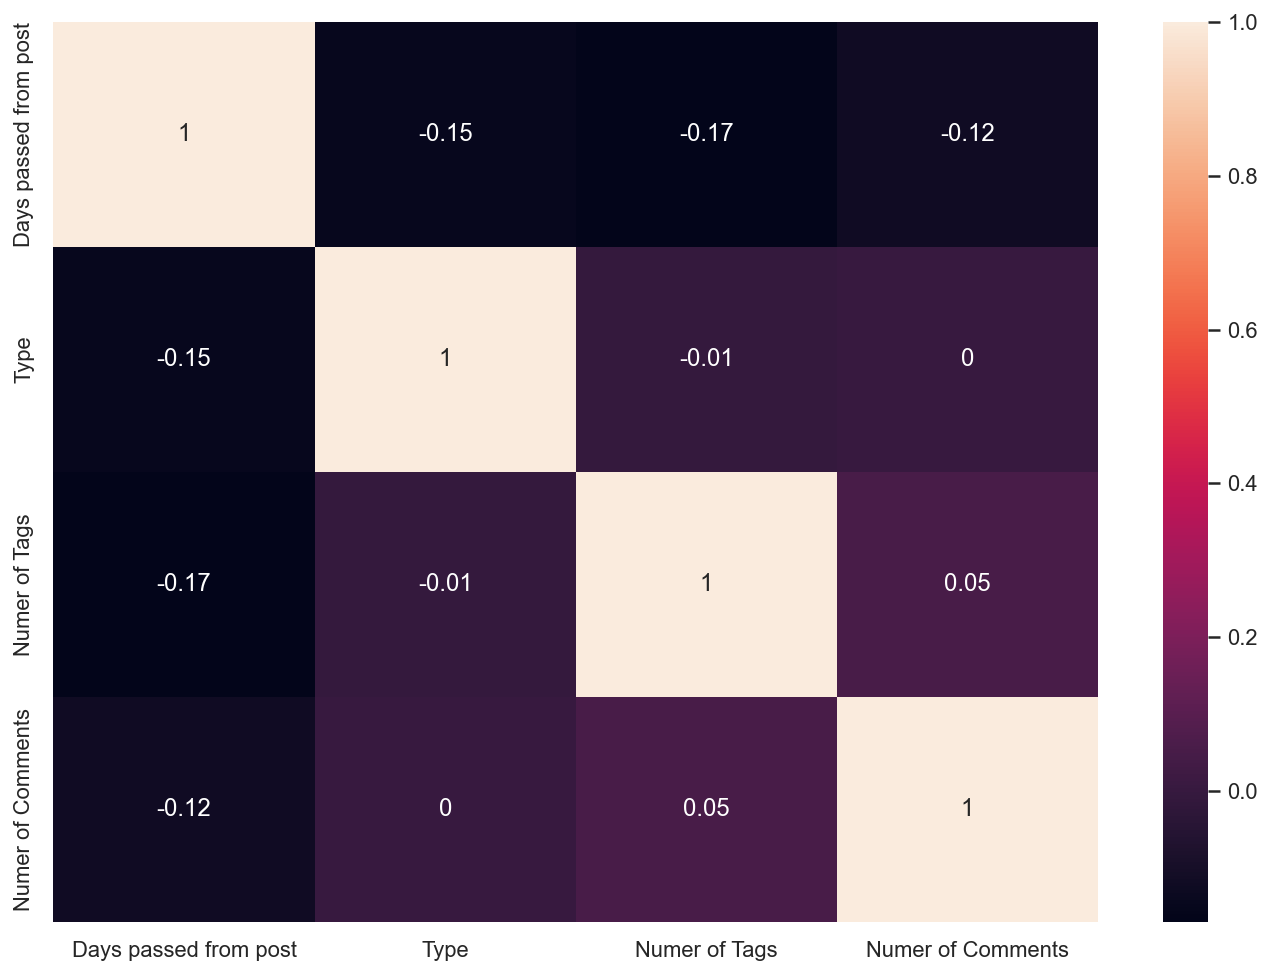

In [17]:
# write your code here:
corr = X.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=corr, annot=True)

    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

-- From the above pairplot I could see the different categories i.e. Number of comments, Number of Tags, Type and days passed form past.

-- We can see in pairplot that the Number of comments and type have the Null correlation, and the number of tags and number of comments has showing positive correlation i.e 0.05

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

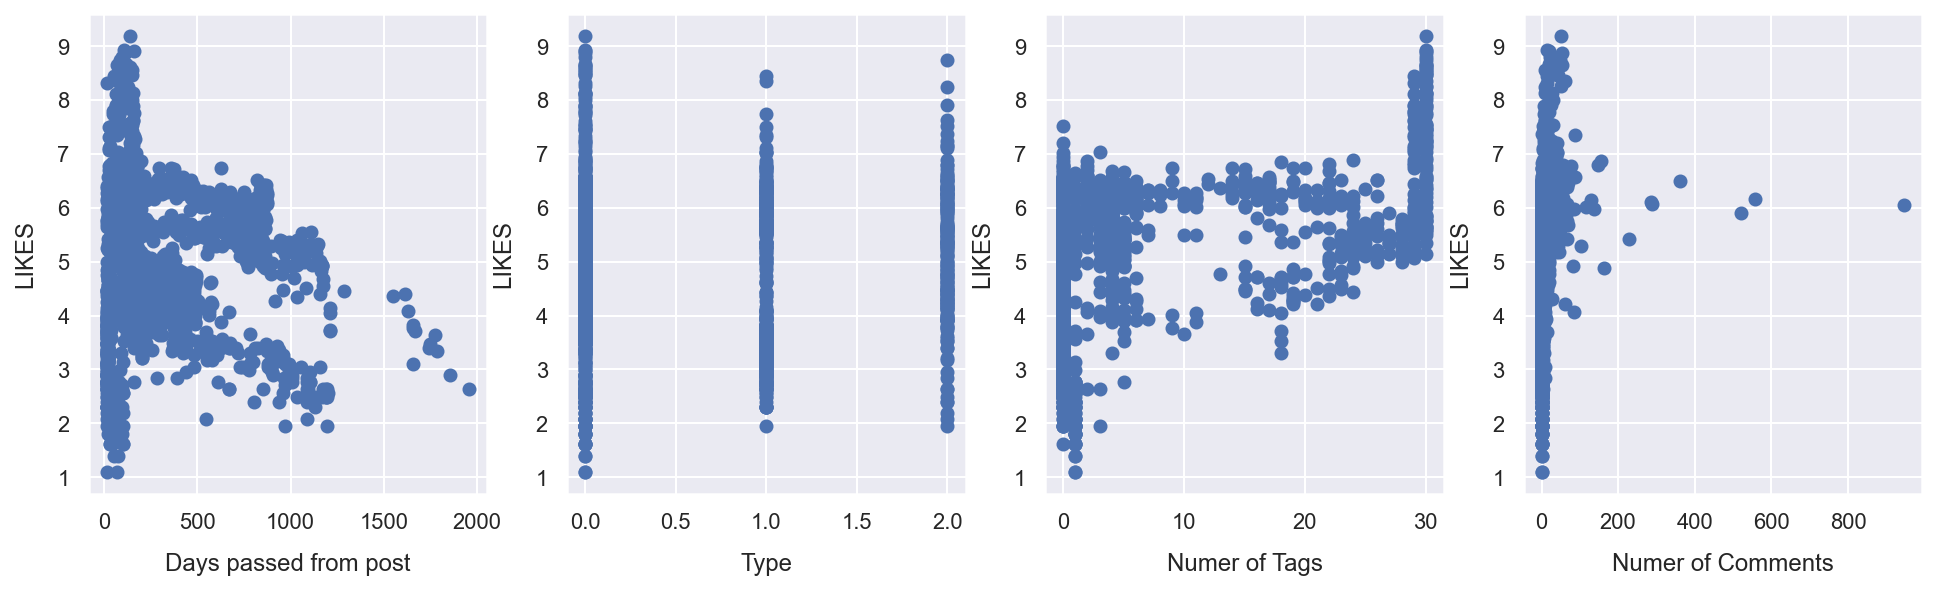

In [32]:
# write your code here
plt.figure(figsize = ( 25 , 15 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = insta_df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'LIKES' )

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

-- In the above first pairplot, we can see that the initially the likes extremely high where the likes are decreasing when the days passes.

--The second pairplot shows the three vertical lines with respected values. Clearly we can see that initially the likes are more.

--Thirt pairplot shows equal distribution of number of tags and likes between the values from 5 to 25 and we can see the maximum at the value on 30

---At last the fourth pairplot shows the highest number of comments with likes initially, and we can see the outliers between the values 200 and 800.

    15- Display the target distribution using histogram (1 points)

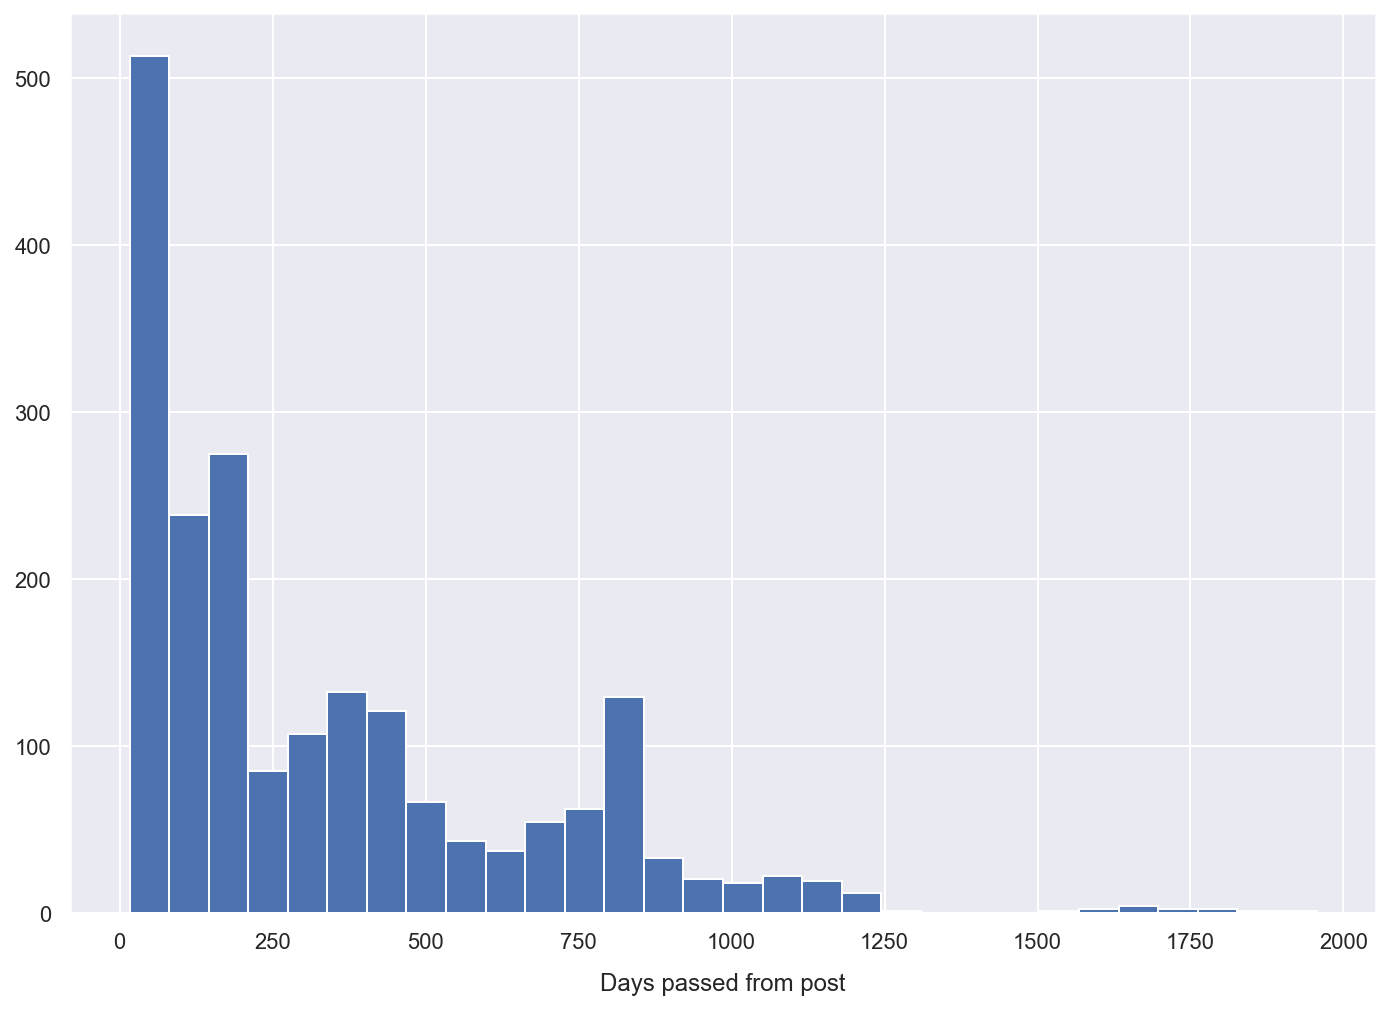

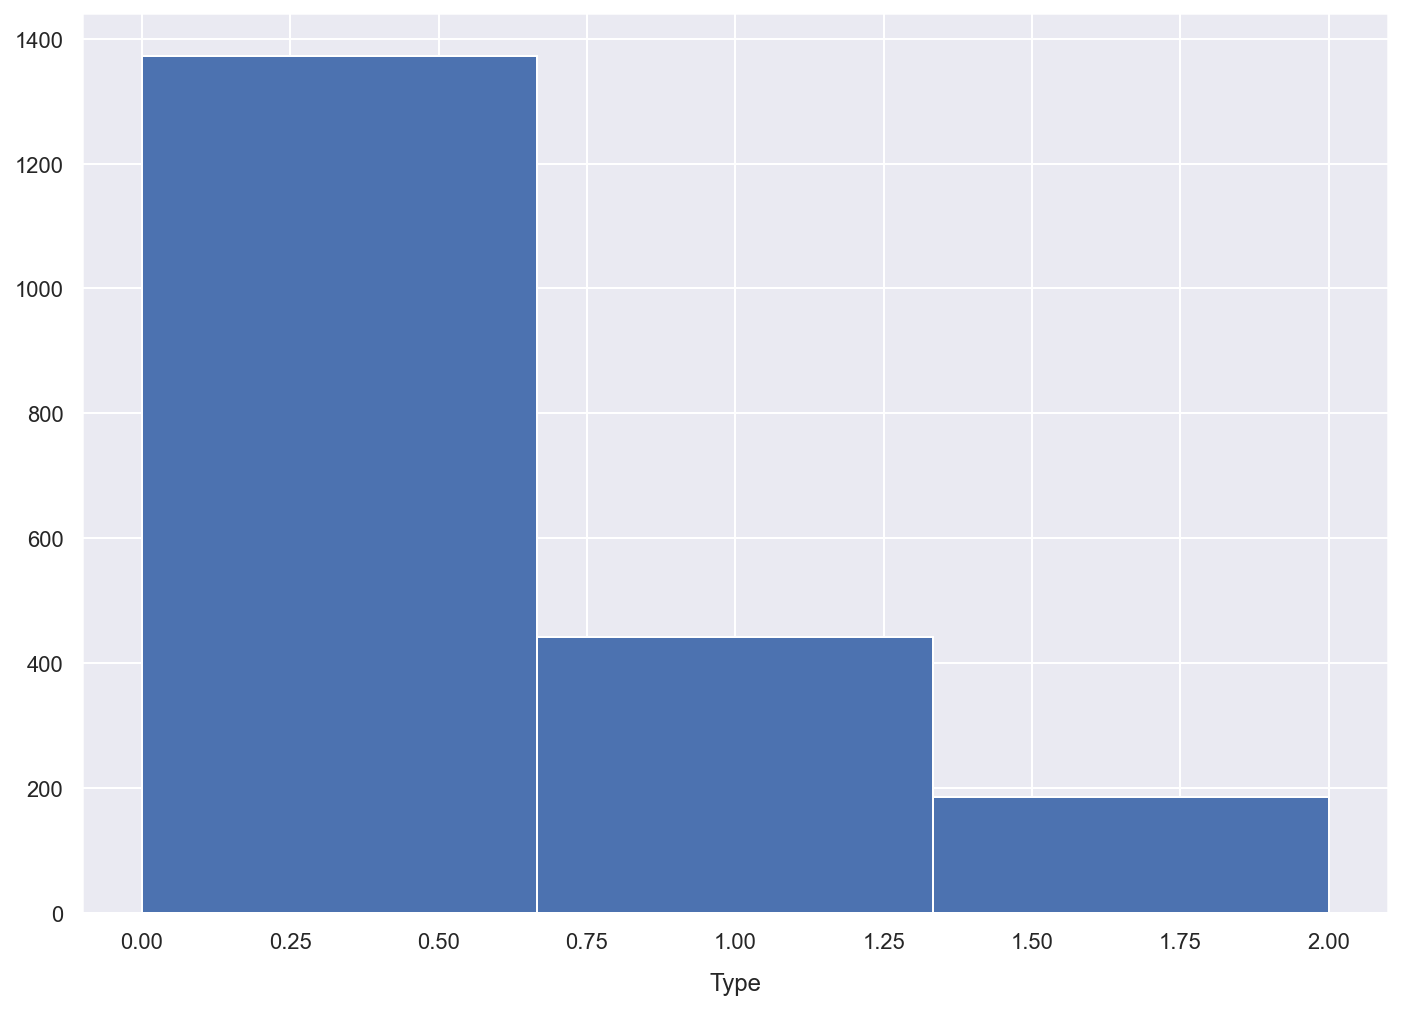

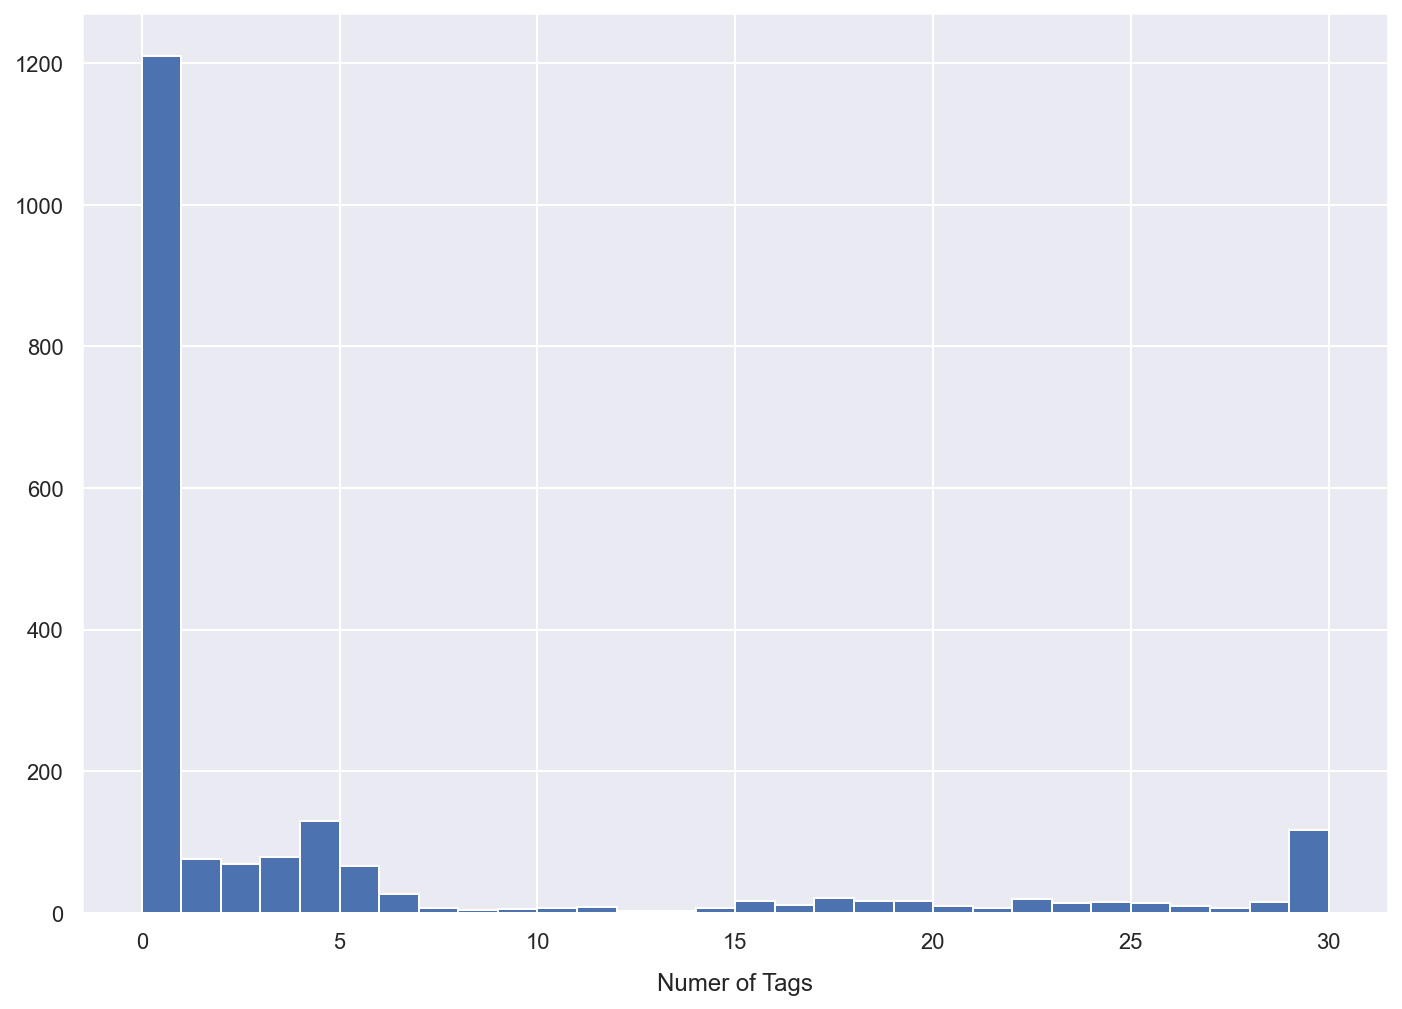

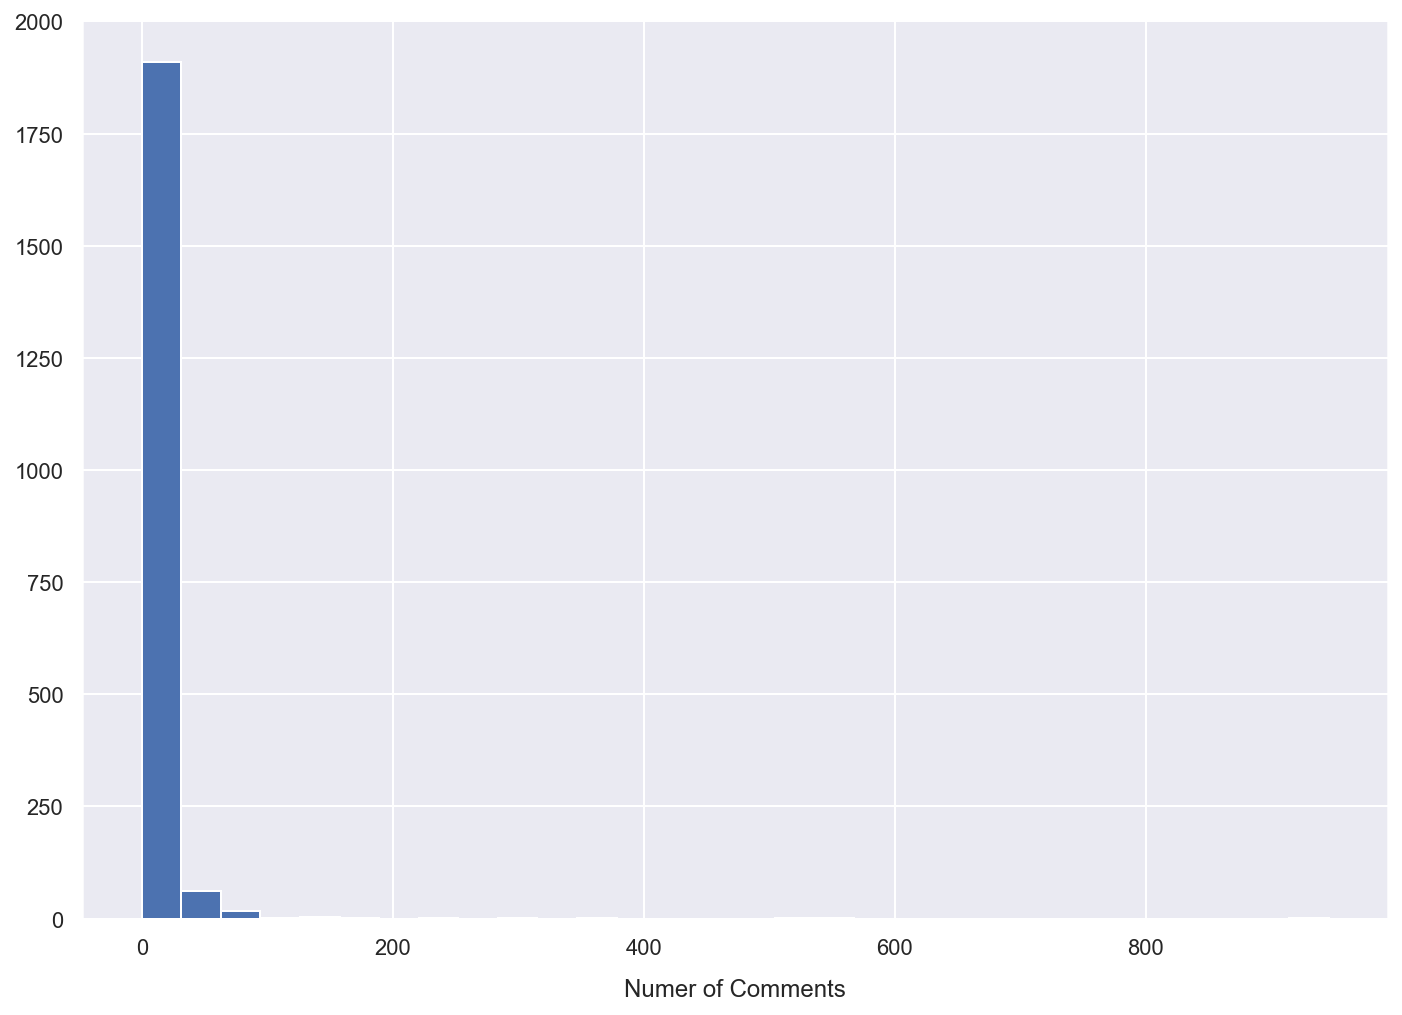

In [19]:
# write your code here:
for f in X:
    try:
        fig = plt.figure()
        num_bins = min((30, len(insta_df[f].unique())))
        insta_df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(insta_df[f].value_counts())
        print('-'*30)
        plt.close()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

--From the above histogram I could see the 'days passed from post', 'Type', 'Number of tags' and 'Number of comments' which status shows in the above histogram with respect to Likes. The values of the likes is different on each histogram

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [20]:
#transfer the target y into log
y = np.log(y)

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [21]:
# Splitting the data:

# print the sizes of our training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [22]:
# writer your code here:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to take the absolute to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(absolute(np.mean(scores_pipe)) ))

Average 10-Fold CV MSE Score: 1.332098587083801


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [23]:
# write your code here:
ridge = Ridge(normalize=True)
param_grid = {'alpha': np.logspace(-3,-2,1,2,3)}
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
grid.fit(X_train,y_train)
best_score = float(format(grid.best_score_, '.4f'))
print('Best CV score: {:.4f}'.format(-1*grid.best_score_))
print('Best parameter :',grid.best_params_)


C:\Users\hp\.splunk\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\hp\.splunk\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipelin

Best CV score: 0.9493
Best parameter : {'alpha': 0.037037037037037035}


C:\Users\hp\.splunk\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\hp\.splunk\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipelin

        B. Lasso: 
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [24]:
# write your code here:

lasso = Lasso(max_iter=10000,normalize=True)
param_grid = {'alpha': np.logspace(-3,-2,1,2,3)}
grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
grid.fit(X_train,y_train)
best_score = float(format(grid.best_score_, '.4f'))
print('Best CV score: {:.4f}'.format(-1*grid.best_score_))
print('Best parameter :',grid.best_params_)

Best CV score: 1.0996
Best parameter : {'alpha': 0.037037037037037035}


C:\Users\hp\.splunk\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\hp\.splunk\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklear

#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [25]:
# write your code here:
pipeline_huber = make_pipeline(StandardScaler(), HuberRegressor())
scores_huber = cross_val_score(pipeline_huber, X_train,y_train, scoring='neg_mean_absolute_error', cv=10)
#force scores to be positive
print("Average 10-Fold CV MSE Score for Huber regression: {}".format(absolute((np.mean(scores_huber)) )))

Average 10-Fold CV MSE Score for Huber regression: 0.922123951221938


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [26]:
# write your code here:
pipeline_ransac = make_pipeline(StandardScaler(),RANSACRegressor())
scores_RANSAC = cross_val_score(pipeline_ransac,X, y, scoring='neg_mean_absolute_error', cv=10)
#force scores to be positive
print("Average 10-Fold CV MSE Score for RANSAC regression: {}".format(absolute((np.mean(scores_RANSAC )) )))

Average 10-Fold CV MSE Score for RANSAC regression: 1.184566435617971


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

--Huber regression model seem to perform well comparitively beacause of its lowest MSE value



    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [27]:
# write your code here:
huber_model = HuberRegressor()
huber_model.fit(X_train,y_train)

HuberRegressor()

    24- Predict the number of likes for test data and compute the MSE (5 points)

In [30]:
# write your code here:
y_predicted = huber_model.predict(X_test)
print('Mean Squared Error for Huber Regression Model: %.2f' % mean_squared_error(y_test,y_predicted))

Mean Squared Error for Huber Regression Model: 1.27


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include: 
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation. 

-- Actually, unlike baseline linear regression fashions, which might be liable to outliers, alogrithms are brilliant at coping with outliers. We understand that the Robust linear regression has its particular relevance, unlike baseline linear regression fashions, which might be liable to outliers, alogrithms are brilliant at coping with outliers. Also we know that the Shrinkage strategies used to linear regression fashions useful resource in version regularization. Based on our data we can easily say that the life of outliers withinside the dataset is a main concern, for this reason the Robust regression version plays alternatively nicely as compared to different fashions.

--Based on the given data, I choosed a regression set of rules for this dataset since the values of the attributes are continuous and we can see the 'Type' is not in continuous.

---After shrinkage strategies were applied, robust regression algorithms surpassed linear regression baseline. This is due to the model's existence of a significant number of outliers and collinearity.

---Linear Regression is the system of locating a line that nice suits the facts factors to be had at the plot, in order that we will use it to expect output values for inputs that aren't gift withinside the facts set we have, with the notion that the ones outputs might fall at the line. Cross-validation is a quantization approach used to evaluate device learning models on a small data set. The method contains a single parameter known as ok, which relates to the number of companies into which a given statistical pattern is to be divided. As a result, the approach is commonly known as ok-fold cross-validation.

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue. 

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_CS_1 . 
---